# Linear Regression with Gradient Descent

In [69]:
%load_ext watermark
%watermark -a 'Ariel Fu' -v -p torch,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Ariel Fu

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 9.4.0

torch     : 2.8.0
pandas    : 2.3.1
matplotlib: 3.10.5



In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [71]:
df = pd.read_csv('./datasets/linreg-data.csv', index_col=0)
df.tail()

,x1,x2,y
995,-0.942094,-0.835856,-22.324428
996,1.222445,-0.403177,-52.121493
997,-0.112466,-1.688230,-57.043196
998,-0.403459,-0.412272,-27.701833
999,0.021351,-0.499017,-9.804714


In [72]:
df[['x1', 'x2']]

,x1,x2
0,-2.201441,-0.468864
1,-0.291041,0.777277
2,-0.327755,0.040071
3,-0.075650,1.821915
4,-0.862493,-0.467493
...,...,...
995,-0.942094,-0.835856
996,1.222445,-0.403177
997,-0.112466,-1.688230
998,-0.403459,-0.412272


In [73]:
# assign features and target
# design matrix
X = torch.tensor(df[['x1', 'x2']].values, dtype=torch.float32)
y = torch.tensor(df['y'].values, dtype=torch.float32)

# Shuffling & train/test split
torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X,y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma

## Implement Linear Regression Model

In [74]:
class LinearRegression1():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, dtype=torch.float)
        self.bias = torch.zeros(1, dtype=torch.float)

    def forward(self, x):
        # same as x @ self.weights + self.bias
        netinputs = torch.add(torch.mm(x, self.weights), self.bias)
        activation = netinputs
        return activation.view(-1)
    
    def backward(self, x, yhat, y):
        # the gradients
        # loss fn: (yhat - y)^2
        # grad loss: 2*(yhat - y)
        grad_loss_yhat = 2*(yhat - y)

        # grad y_hat with respect to the weights
        grad_yhat_weights = x
        grad_yhat_bias = 1.

        # Chain rule: inner times outer
        grad_loss_weights = torch.mm(grad_yhat_weights.t(), grad_loss_yhat.view(-1, 1)) / y.size(0)
        grad_loss_bias = torch.sum(grad_yhat_bias*grad_loss_yhat) / y.size(0)

        return (-1)*grad_loss_weights, (-1)*grad_loss_bias

## Define Training and Evaluation Functions

In [75]:
####################################################
##### Training and evaluation wrappers
###################################################

def loss(yhat, y): # MSE
    return torch.mean((yhat-y)**2)

def train(model, x, y, num_epoch, learning_rate = 0.01):
    cost = []
    for e in range(num_epoch):
        #### Compute outputs ####
        yhat = model.forward(x)

        #### Compute gradients ####
        negative_grad_w, negative_grad_b = model.backward(x, yhat, y)

        #### Update weights ####
        model.weights += learning_rate * negative_grad_w
        model.bias += learning_rate * negative_grad_b

        #### Logging ####
        yhat = model.forward(x) # compute yhat here because for see the last epoch's loss
        current_loss = loss(yhat, y)
        print(f"epoch {e+1}: \n")
        print(f"| MSE {current_loss: .5f}")
        cost.append(current_loss)

    return cost


## Train Linear Regression Model

In [76]:
model = LinearRegression1(num_features=X_train.size(1))
cost = train(model, 
             x=X_train, y = y_train,
             num_epoch=100,
             learning_rate=0.05)

epoch 1: 

| MSE  1532.67603
epoch 2: 

| MSE  1312.39844
epoch 3: 

| MSE  1133.91809
epoch 4: 

| MSE  989.30280
epoch 5: 

| MSE  872.12610
epoch 6: 

| MSE  777.18109
epoch 7: 

| MSE  700.24921
epoch 8: 

| MSE  637.91248
epoch 9: 

| MSE  587.40167
epoch 10: 

| MSE  546.47290
epoch 11: 

| MSE  513.30811
epoch 12: 

| MSE  486.43433
epoch 13: 

| MSE  464.65808
epoch 14: 

| MSE  447.01224
epoch 15: 

| MSE  432.71332
epoch 16: 

| MSE  421.12634
epoch 17: 

| MSE  411.73697
epoch 18: 

| MSE  404.12830
epoch 19: 

| MSE  397.96259
epoch 20: 

| MSE  392.96606
epoch 21: 

| MSE  388.91708
epoch 22: 

| MSE  385.63589
epoch 23: 

| MSE  382.97684
epoch 24: 

| MSE  380.82196
epoch 25: 

| MSE  379.07571
epoch 26: 

| MSE  377.66052
epoch 27: 

| MSE  376.51367
epoch 28: 

| MSE  375.58429
epoch 29: 

| MSE  374.83099
epoch 30: 

| MSE  374.22055
epoch 31: 

| MSE  373.72583
epoch 32: 

| MSE  373.32492
epoch 33: 

| MSE  372.99994
epoch 34: 

| MSE  372.73660
epoch 35: 

| MSE  3

## Evaluate Linear Regression Model

### Plot MSE

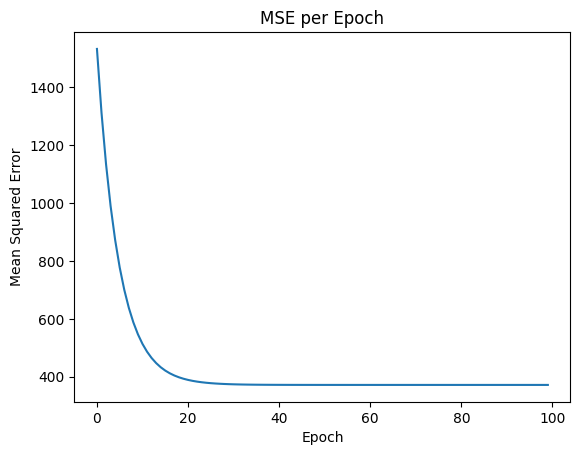

In [77]:
plt.plot(range(len(cost)), cost)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title("MSE per Epoch")
plt.show()


In [78]:
train_pred = model.forward(X_train)
test_pred = model.forward(X_test)

print(f'Train MSE: {loss(train_pred, y_train):.5f}')
print(f'Test MSE: {loss(test_pred, y_test):.5f}')

Train MSE: 371.61032
Test MSE: 406.88412


## Compare with Analytical Solution 

**w** = ( **X**^T **X** )^-1 **X^T** y

In [79]:
print('Weights', model.weights)
print('Bias', model.bias)

Weights tensor([[ 0.3623],
        [37.8790]])
Bias tensor([-0.5464])


In [80]:
def analytical_solution(x, y):
    Xb = torch.cat((torch.ones((x.size(0), 1)), x), dim=1)
    w = torch.zeros(x.size(1))
    z = torch.inverse(torch.matmul(Xb.t(), Xb))
    params = torch.matmul(z, torch.matmul(Xb.t(), y))
    b, w = torch.tensor([params[0]]), params[1:].view(x.size(1), 1)
        # params[0] = the first element → bias (intercept)
        # params[1:] = the rest → feature weights.
        # .view(x.size(1), 1) = reshape into (n_features, 1) column vector.
    return b, w 

w, b = analytical_solution(X_train, y_train)
print('Analytical weights', w)
print('Analytical bias', b)

Analytical weights tensor([-0.5464])
Analytical bias tensor([[ 0.3624],
        [37.8801]])


# ADALINE with Stochastic Gradient Descent (Minibatch)
-------------------------------------------------------

In this notebook, we are implementing ADALINE "by hand" without using PyTorch's autograd capabilities. 

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
%matplotlib inline

## Load & Prepare a Toy Dataset

In [82]:
df = pd.read_csv('./datasets/iris.data', index_col=None, header=None)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = df.iloc[50:150]
# print(df.tail())
df['y'] = df['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
df.tail()

,x1,x2,x3,x4,y
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [83]:
# Assign features and target
X = torch.tensor(df[['x2', 'x3']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.int)

# Shuffling & train/test split
torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0) * 0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

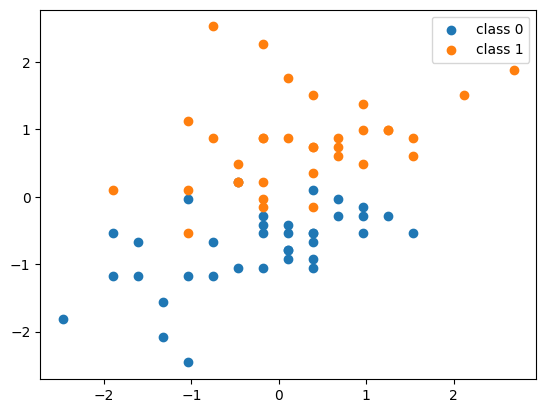

In [84]:
plt.scatter(x = X_train[y_train == 0, 0], y = X_train[y_train == 0, 1], label = 'class 0')
plt.scatter(x = X_train[y_train == 1, 0], y = X_train[y_train == 1, 1], label = 'class 1')
plt.legend()
plt.show()

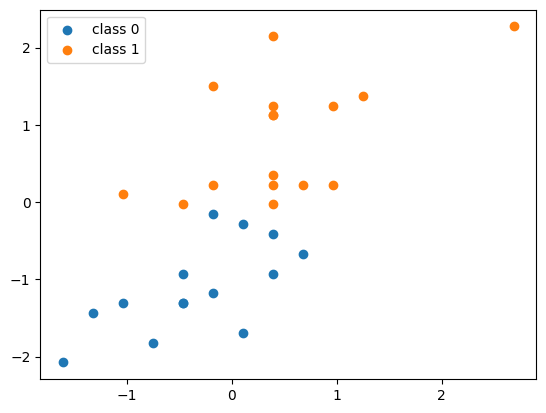

In [85]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='class 1')
plt.legend()
plt.show()

## Implement ADALINE Model

In [86]:
class Adaline1():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, dtype=torch.float)
        self.bias = torch.zeros(1, dtype=torch.float)

    def forward(self, x):
        netinputs = torch.add(torch.mm(x, self.weights), self.bias)
        activation = netinputs
        return activation.view(-1)
    
    def backward(self, x, yhat, y):
        grad_loss_yhat = 2 * (yhat - y)

        grad_yhat_weights = x
        grad_yhat_bias = 1.

        # Chain rule: inner times outer
        grad_loss_weights = torch.mm(grad_yhat_weights.t(), grad_loss_yhat.view(-1, 1) / y.size(0))
        grad_loss_bias = torch.sum(grad_yhat_bias*grad_loss_yhat) / y.size(0)

        # return negative gradient
        return (-1)*grad_loss_weights, (-1)*grad_loss_bias


## Define Training and Evaluation Functions

In [87]:
####################################################
##### Training and evaluation wrappers
###################################################

def loss(yhat, y):
    return torch.mean((yhat - y)**2)

def train(model, x, y, num_epochs,
          learning_rate=0.01, seed=123, minibatch_size=10):
    cost = []
    torch.manual_seed(seed)

    for e in range(num_epochs):
        #### Shuffle epoch
        shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)
        minibatches = torch.split(shuffle_idx, minibatch_size)

        for minibatch_idx in minibatches:
            #### Compute outputs ####
            yhat = model.forward(x[minibatch_idx])

            #### Compute gradients ####
            negative_grad_w, negative_grad_b = model.backward(x[minibatch_idx], yhat, y[minibatch_idx])

            #### Update weights ####
            model.weights += learning_rate * negative_grad_w
            model.bias += learning_rate * negative_grad_b

            #### Logging ####
            minibatch_loss = loss(yhat, y[minibatch_idx])
            print('    Minibatch MSE: %.3f' % minibatch_loss)

        #### Logging ####
        yhat = model.forward(x)
        curr_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % curr_loss)
        cost.append(curr_loss)

    return cost

## Train Model

In [88]:
model = Adaline1(num_features=X_train.size(1))
cost = train(model, 
             X_train, y_train.float(),
             num_epochs=20,
             learning_rate=0.1,
             seed=123,
             minibatch_size=10)

    Minibatch MSE: 0.500
    Minibatch MSE: 0.341
    Minibatch MSE: 0.220
    Minibatch MSE: 0.245
    Minibatch MSE: 0.157
    Minibatch MSE: 0.133
    Minibatch MSE: 0.144
Epoch: 001 | MSE: 0.12142
    Minibatch MSE: 0.107
    Minibatch MSE: 0.147
    Minibatch MSE: 0.064
    Minibatch MSE: 0.079
    Minibatch MSE: 0.185
    Minibatch MSE: 0.063
    Minibatch MSE: 0.135
Epoch: 002 | MSE: 0.09932
    Minibatch MSE: 0.093
    Minibatch MSE: 0.064
    Minibatch MSE: 0.128
    Minibatch MSE: 0.099
    Minibatch MSE: 0.079
    Minibatch MSE: 0.157
    Minibatch MSE: 0.080
Epoch: 003 | MSE: 0.09693
    Minibatch MSE: 0.131
    Minibatch MSE: 0.146
    Minibatch MSE: 0.050
    Minibatch MSE: 0.095
    Minibatch MSE: 0.106
    Minibatch MSE: 0.072
    Minibatch MSE: 0.102
Epoch: 004 | MSE: 0.09658
    Minibatch MSE: 0.107
    Minibatch MSE: 0.204
    Minibatch MSE: 0.149
    Minibatch MSE: 0.054
    Minibatch MSE: 0.060
    Minibatch MSE: 0.056
    Minibatch MSE: 0.069
Epoch: 005 | MSE: 0.0

## Evaluate ADALINE Model
###Plot Loss (MSE)

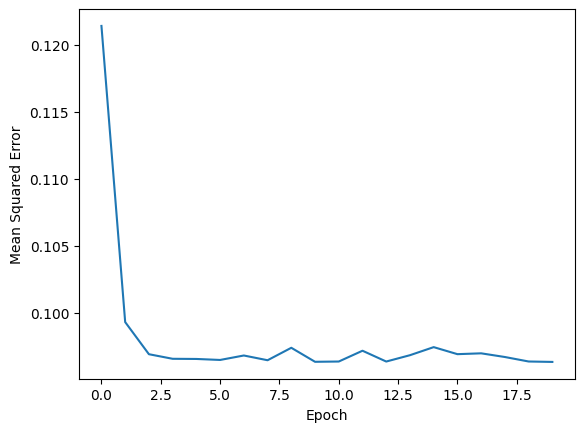

In [89]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

### Compare with analytical solution

In [90]:
print('Weights', model.weights)
print('Bias', model.bias)

Weights tensor([[-0.0763],
        [ 0.4181]])
Bias tensor([0.4888])


In [91]:
def analytical_solution(x, y):
    Xb = torch.cat( (torch.ones((x.size(0), 1)), x), dim=1)
    w = torch.zeros(x.size(1))
    z = torch.inverse(torch.matmul(Xb.t(), Xb))
    params = torch.matmul(z, torch.matmul(Xb.t(), y))
    b, w = torch.tensor([params[0]]), params[1:].view(x.size(1), 1)
    return w, b

w, b = analytical_solution(X_train, y_train.float())
print('Analytical weights', w)
print('Analytical bias', b)

Analytical weights tensor([[-0.0703],
        [ 0.4219]])
Analytical bias tensor([0.4857])


## Evaluate on Evaluation Metric (Prediction Accuracy)

In [94]:
y_train.size()

torch.Size([70])

In [96]:
ones = torch.ones(y_train.size())
zeros = torch.zeros(y_train.size())
train_pred = model.forward(X_train)
predicted_label = torch.where(train_pred > 0.5, 
                 ones, 
                 zeros).int() 
train_acc = torch.mean(
    (torch.where(train_pred > 0.5, 
                 ones, 
                 zeros).int() == y_train).float())

ones = torch.ones(y_test.size())
zeros = torch.zeros(y_test.size())
test_pred = model.forward(X_test)
test_acc = torch.mean(
    (torch.where(test_pred > 0.5, 
                 ones, 
                 zeros).int() == y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Test Accuracy: %.2f' % (test_acc*100))

Training Accuracy: 90.00
Test Accuracy: 96.67


In [95]:
train_pred.size()

torch.Size([70])

In [100]:
torch.sum((predicted_label == y_train)) / predicted_label.size(0) * 100

tensor(90.)

## Decision Boundary

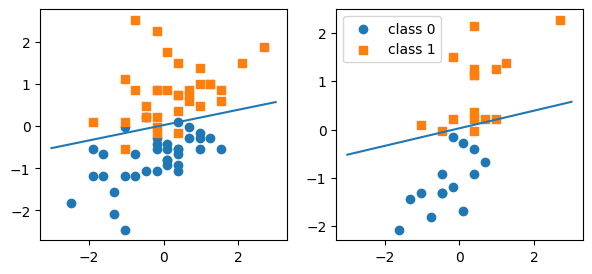

In [ ]:
##########################
### 2D Decision Boundary
##########################

w, b = model.weights, model.bias - 0.5

x_min = -3
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 3
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()